# 🏠 House Price Analysis & Prediction

This notebook demonstrates an **end-to-end analysis and prediction** of house prices using Python.

It includes:
- Creating a synthetic dataset with **missing** and **duplicate** values
- Cleaning data (handling missing & duplicate entries)
- Exploratory Data Analysis (EDA)
- Machine Learning model to predict house prices

Let's get started 👇


## 1️⃣ Create Dataset with Missing & Duplicate Values

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Generate synthetic data
np.random.seed(42)
n = 200

data = {
    "house_id": np.arange(1, n+1),
    "area_sqft": np.random.randint(600, 4000, n),
    "bedrooms": np.random.randint(1, 6, n),
    "bathrooms": np.random.randint(1, 4, n),
    "age_yrs": np.random.randint(0, 50, n),
    "city": np.random.choice(["Kolkata", "Delhi", "Mumbai", "Chennai"], n),
}

base_price = 3000 * (data["bedrooms"]) + 100 * (data["area_sqft"]/10) - 500 * data["age_yrs"] + np.random.normal(0, 50000, n)
data["price"] = np.round(base_price, 2)

df = pd.DataFrame(data)

# Add missing values
for col in ["area_sqft", "bedrooms", "bathrooms", "age_yrs"]:
    df.loc[np.random.choice(df.index, 10, replace=False), col] = np.nan

# Add duplicate rows
df = pd.concat([df, df.sample(5, random_state=1)], ignore_index=True)

# Save raw CSV
df.to_csv("house_prices_raw.csv", index=False)
print("✅ Dataset with missing & duplicate values saved as 'house_prices_raw.csv'")
df.head(10)


✅ Dataset with missing & duplicate values saved as 'house_prices_raw.csv'


,house_id,area_sqft,bedrooms,bathrooms,age_yrs,city,price
0,1,3774.0,NaN,2.0,34.0,Chennai,-20040.91
1,2,1460.0,1.0,2.0,22.0,Mumbai,-62539.99
2,3,1894.0,1.0,1.0,NaN,Mumbai,54248.88
3,4,1730.0,3.0,2.0,42.0,Mumbai,100770.83
4,5,1695.0,1.0,2.0,10.0,Mumbai,-54978.38
5,6,NaN,4.0,3.0,17.0,Kolkata,68568.46
6,7,2238.0,5.0,2.0,NaN,Kolkata,-18152.13
7,8,2769.0,1.0,3.0,11.0,Delhi,833.73
8,9,1066.0,3.0,1.0,8.0,Delhi,-13959.70
9,10,1838.0,3.0,1.0,9.0,Mumbai,-20319.54


## 2️⃣ Data Cleaning

In [2]:

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates
df = df.drop_duplicates()

# Check missing values
print("Missing values before handling:")
print(df.isna().sum())

# Fill missing numeric columns with median
num_cols = ["area_sqft", "bedrooms", "bathrooms", "age_yrs"]
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

print("\nMissing values after handling:")
print(df.isna().sum())


Number of duplicate rows: 5
Missing values before handling:
house_id      0
area_sqft    10
bedrooms     10
bathrooms    10
age_yrs      10
city          0
price         0
dtype: int64

Missing values after handling:
house_id     0
area_sqft    0
bedrooms     0
bathrooms    0
age_yrs      0
city         0
price        0
dtype: int64


## 3️⃣ Exploratory Data Analysis (EDA)

         house_id    area_sqft    bedrooms   bathrooms    age_yrs  \
count  200.000000   200.000000  200.000000  200.000000  200.00000   
mean   100.500000  2359.375000    2.790000    1.895000   24.00000   
std     57.879185   924.886663    1.350935    0.804494   14.39919   
min      1.000000   621.000000    1.000000    1.000000    0.00000   
25%     50.750000  1620.750000    1.750000    1.000000   11.75000   
50%    100.500000  2324.500000    3.000000    2.000000   25.00000   
75%    150.250000  3180.000000    4.000000    3.000000   36.00000   
max    200.000000  3985.000000    5.000000    3.000000   49.00000   

               price  
count     200.000000  
mean    16977.120950  
std     51908.085433  
min   -134994.330000  
25%    -18506.462500  
50%     18026.520000  
75%     51408.245000  
max    151587.990000  


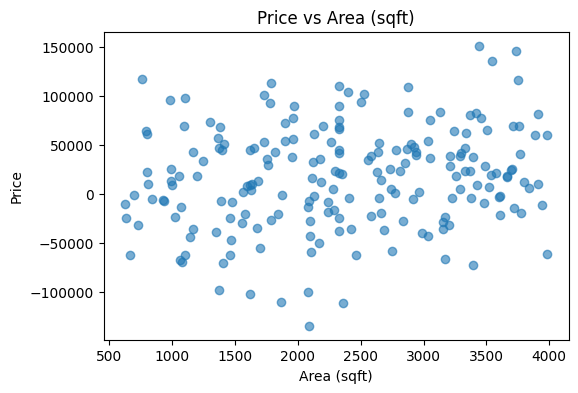

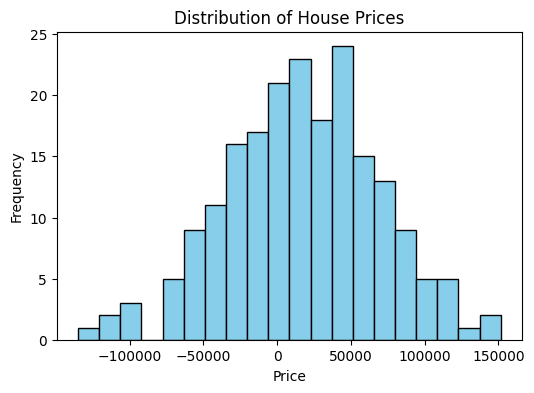

In [3]:

print(df.describe())

plt.figure(figsize=(6,4))
plt.scatter(df["area_sqft"], df["price"], alpha=0.6)
plt.title("Price vs Area (sqft)")
plt.xlabel("Area (sqft)")
plt.ylabel("Price")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(df["price"], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


## 4️⃣ Model Building — Predict House Prices

In [4]:

# Encode categorical data
df = pd.get_dummies(df, columns=["city"], drop_first=True)

# Split data
X = df.drop(columns=["price", "house_id"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 58559.99
MAE: 45631.80


## 5️⃣ Save Cleaned Dataset

In [5]:

df.to_csv("house_prices_cleaned.csv", index=False)
print("✅ Cleaned dataset saved as 'house_prices_cleaned.csv'")


✅ Cleaned dataset saved as 'house_prices_cleaned.csv'


In [6]:

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

In [7]:

models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=200, random_state=42)
}

results = []
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions[name] = pred
    mse= mean_squared_error(y_test, pred) #return mse
    rmse=np.sqrt(mse) #convert to rmse
    mae = mean_absolute_error(y_test, pred)
    results.append({"model": name, "RMSE": rmse, "MAE": mae})

results_df = pd.DataFrame(results).sort_values("RMSE")
results_df


,model,RMSE,MAE
0,LinearRegression,58559.993890,45631.801075
2,GradientBoosting,58693.797976,47530.923041
1,RandomForest,59164.572527,46866.584012


📊 Model Performance Comparison:
               Model          RMSE           MAE
0  Linear Regression  58559.993890  45631.801075
1      Random Forest  59915.444046  46959.323897
2  Gradient Boosting  60324.949580  49041.109644

🏆 Best Model Based on RMSE: Linear Regression


C:\Users\wwwdh\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


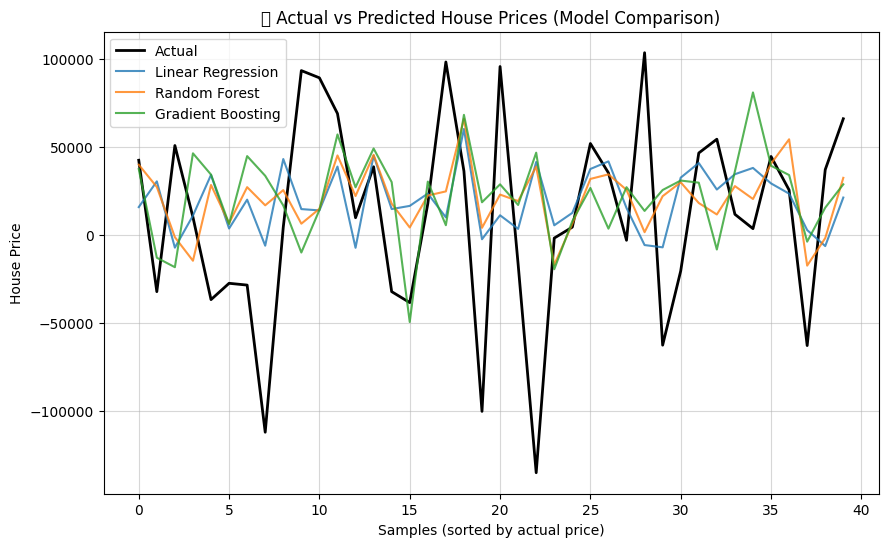

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Store results
results = {"Model": [], "RMSE": [], "MAE": []}
predictions = {}

# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    results["Model"].append(name)
    results["RMSE"].append(rmse)
    results["MAE"].append(mae)

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print("📊 Model Performance Comparison:")
print(results_df)

# Find best model (lowest RMSE)
best_model = results_df.loc[results_df["RMSE"].idxmin(), "Model"]
print(f"\n🏆 Best Model Based on RMSE: {best_model}")

# Sort test data for smoother line visualization
y_test_sorted = np.array(y_test)
sorted_idx = np.argsort(y_test_sorted)

# Plot Actual vs Predicted for each model
plt.figure(figsize=(10,6))
plt.plot(y_test_sorted, label='Actual', color='black', linewidth=2)

for name, y_pred in predictions.items():
    plt.plot(y_pred[sorted_idx], label=name, alpha=0.8)

plt.title("📈 Actual vs Predicted House Prices (Model Comparison)")
plt.xlabel("Samples (sorted by actual price)")
plt.ylabel("House Price")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

In [16]:
# 🏠 Predict future house prices using the best model


# Predict
future_predictions = final_model.predict(future_data)

# Show predictions
future_df = future_data.copy()
future_df["Predicted_Price"] = np.round(future_predictions, 2)

print("🏡 Future House Price Predictions:")
display(future_df)

🏡 Future House Price Predictions:


,area_sqft,bedrooms,bathrooms,age_yrs,city_Delhi,city_Kolkata,city_Mumbai,Predicted_Price
0,1500,2,1,5,0,1,0,18033.56
1,2500,3,2,10,0,0,1,32720.74
2,3500,4,3,15,0,0,0,24243.83
